Привет еще раз, меня зовут Аблаев Люман. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Полезные ссылки:</font>
* Могу предложить обратить внимание на вот этот курс: https://vk.com/dlschool_mipt

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Большое спасибо за проделанную работу.
* Радует, что проект хорошо структурирован. Приятно проверять такие работы.
* Есть небольшие недочеты с анализом и выводами, думаю ты легко их поправишь.
- Жду твой обновленный проект =)


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность
- Приятно видеть фидбек на комментарии.
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!

# Определение возраста покупателей

<div class="alert alert-block alert-info">
<b>Совет: </b> Не забывай про описание проекта
</div>

<div class="alert alert-warning"> 
<b> Комментарий студентки: </b> 
    Добавила
</div>

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:

- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

## Исследовательский анализ данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# создание датафрейма
labels = pd.read_csv('/datasets/faces/labels.csv')
# вывод его размеров
display(labels.shape)

(7591, 2)

In [3]:
display(labels.head(5))

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
# информация о датафрейме
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Пропусков в данных нет. Типы столбцоы корректны. 

In [5]:
# описание значений в столбце с возрастом
labels['real_age'].describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

<AxesSubplot:>

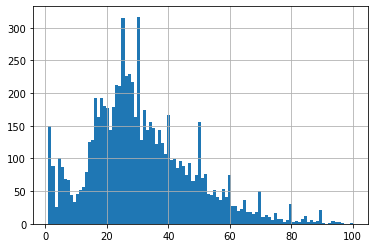

In [8]:
# построение распределения
labels['real_age'].hist(bins=100);

Больше всего данных в диапозоне от 15 до 30 лет. Полагаю, что это связано с тем, что в эти годы люди наиболее активно пользуются социальными сетями, где как раз-таки и выкладывают фотографии. После 30 и до 100 лет количество фотографий заметно падает, что связано с тем, что чем страше люди, тем меньше вероятность, что они являются активными пользователями интернета, а также мало людей доживают до такого приклонного возраста. Есть несколько пиков в юбилейные даты - 20б 25б 30, 40, 50, 60 и так далее, полагаю, это связано с тем, что на днях рождениях чаще всего люди фотографируются и зачастую выкладывают. 



<div class="alert alert-block alert-info">
<b>Совет:</b> Выбрано не лучшее кол-во количество корзин - попробуй 100.  Такое количество позволяют увидеть все основные особенности: пики, выбросы, вид распределения. Важно обратить внимание на пики и выдвинуть предположение откуда они могли появиться.  
      

<div class="alert alert-warning"> 
<b> Комментарий студентки: </b> 
    Дописала
</div>



<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Есть  контакт
</div>



In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

In [ ]:
features, target = next(train_gen_flow)
fig = plt.figure(figsize=(10,10))
for i in range(15):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Данные распределны нормально и пропусков нет, модель явно не получит неверные значения для обучения. Датасет достаточного размера для обучения. Все фотографии разичны: разный свет и цвет, положение, повороты и прочее, то есть аугментацию можно и не делать, модель все равно будет достаточно полной. 

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что фотографии выведены в несколько рядов (можно еще сверху указать  возраст). 
</div>


<div class="alert alert-danger">
<b>Ошибка</b>

По результатам анализа датасета, гистограммы и фото необходимы выводы:

1 Пояснения по размеру выборки (большая, маленькая, достаточная) и предложения по работе с датасетом такого размера.

2 Выводы по гистограмме. Обратить внимание на выбросы, пики в круглые даты и выдвинуть предположения почему они могли появиться.
    
~~3. По фото. Описать особенности увиденные на фото: цветность, качество, размер лиц, угол поворота и т.п.~~

<div class="alert alert-warning"> 
<b> Комментарий студентки: </b> 
    Дописала
</div>



<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Анализ проведен 
</div>



## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from tensorflow import keras
import numpy as np
from tensorflow.keras.applications.resnet import ResNet50
import pandas as pd

def load_train(path):
    dataframe = pd.read_csv(path + 'labels.csv')
    train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
        validation_split=0.25)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=dataframe,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training')

    return train_gen_flow

def load_test(path):
    dataframe = pd.read_csv(path + 'labels.csv')
    test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
        validation_split=0.25)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=dataframe,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation')

    return test_gen_flow

def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)

    model = keras.models.Sequential()
    optimizer = keras.optimizers.Adam(lr=0.0001)

    model.add(backbone)
    model.add(keras.layers.GlobalAveragePooling2D())

    model.add(keras.layers.Dense(units=1, activation='relu'))

    model.compile(loss='mse', optimizer=optimizer, 
    metrics=['mae'])
    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=10,
steps_per_epoch=None, validation_steps=None):
    model.fit(train_data, 
              validation_data=(test_data),
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model 

```

```

Epoch 1/10
356/356 - 63s - loss: 210.6648 - mae: 10.6899 - val_loss: 889.0694 - val_mae: 25.0286
Epoch 2/10
356/356 - 56s - loss: 67.4312 - mae: 6.2622 - val_loss: 125.0278 - val_mae: 8.3381
Epoch 3/10
356/356 - 49s - loss: 36.8597 - mae: 4.6818 - val_loss: 90.5838 - val_mae: 7.0282
Epoch 4/10
356/356 - 48s - loss: 23.3239 - mae: 3.7652 - val_loss: 74.5376 - val_mae: 6.4957
Epoch 5/10
356/356 - 56s - loss: 18.0730 - mae: 3.2495 - val_loss: 83.0221 - val_mae: 6.8712
Epoch 6/10
356/356 - 54s - loss: 16.4980 - mae: 3.0708 - val_loss: 80.9700 - val_mae: 6.7607
Epoch 7/10
356/356 - 45s - loss: 12.9675 - mae: 2.7322 - val_loss: 72.8797 - val_mae: 6.4467
Epoch 8/10
356/356 - 55s - loss: 10.8663 - mae: 2.5204 - val_loss: 67.9351 - val_mae: 6.2799
Epoch 9/10
356/356 - 55s - loss: 9.7794 - mae: 2.3571 - val_loss: 71.6046 - val_mae: 6.5102
Epoch 10/10
356/356 - 49s - loss: 9.5164 - mae: 2.3242 - val_loss: 69.3710 - val_mae: 6.1851

119/119 - 11s - loss: 69.3710 - mae: 6.1851
Test MAE: 6.1851

```

## Анализ обученной модели

Передо мной стояла задача создать инструмент, который по фотографии определит приблизительный возраст человека. Мною была создаана и обучена нейронная сеть на основе ResNet50 с метрикой MAE и функцией потерь MSE с одним нейроном с активацией ReLu на последним слоем. Так как модель в результате должна предсказывать число, это задача регрессии. Предварительно, для данных был создан генератор для извлечения из файла и податчик батчами размером 16 для того, чтобы не перегружать оперативную память компьютера. Модель обучалась в течении 10 эпох, где значение ошибки упало с 25 до 6.1, что является хорошим результатом. Каждая эпоха по времени длилась 1 минуту, а общее время обучения составило 10 минут, что тоже крайне хороший результат.  

<div class="alert alert-danger">
<b>Ошибка</b> Отсутствует анализ обученной модели

<div class="alert alert-warning"> 
<b> Комментарий студентки: </b> 
    Прикол, конечно, но у меня был вывод... Напишу еще раз
</div>



<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Видимо косяк платформы, сорри за это. У самого такое иногда случается во время проверки, если не убедиться, что блокетон сохранился. С технической точки зрения анализ проведен корректно
</div>



<div class="alert alert-block alert-info">
<b>Совет[2]: </b> Неплохо  было  бы сказать пару слов о запросах заказчика - насколько хорошо полученная модель позволяет решить поставленные бизнесом задачи.
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы